In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib widget

In [3]:
from zipfile import ZipFile
import sys, os

# Библиотека вызова функций, специально разработанных для данного ноутбука
sys.path.insert(1, '../')

from utils.config_reader import config_reader
 
 

# import constants from the config
config = config_reader('../config/data_config.json') 

# path for data
PATH = config.PATH

# Reading files with ".npy" and 'csv' extension and saving them to the dictionnary "mounts"
mounts = dict()

with ZipFile(os.path.join(PATH, 'data.zip')) as myzip:
    for file in myzip.namelist():
            mounts[f"{file[:-4]}".format(file)] = pd.read_csv(myzip.open(file), index_col=0)

mounts.keys()

dict_keys(['free_movements_2', 'gestures_test_2', 'gestures_train_2', 'gestures_protocol_2', 'gestures_protocol', 'gestures_test', 'gestures_train', 'free_movements'])

# Abbreviations
OMG — optomiography  
ACC — accelerometer  
GYR — gyroscope  
ENC - encoders (fingers of prosthesis or gloves)  
model — model of data  

# Data

In [4]:
gestures_train =  mounts['gestures_train']

print(gestures_train.shape)
gestures_train.head()

(28976, 65)


,0,1,2,3,4,5,6,7,8,9,...,GYR2,ENC0,ENC1,ENC2,ENC3,ENC4,ENC5,BUTTON,SYNC,ts
0,10,8,29,2846,2929,2873,2598,24,8,6,...,32,37,50,54,44,5,0,0,0,1174956
1,10,8,28,2846,2931,2873,2597,24,8,13,...,31,37,50,54,44,5,0,0,0,1174989
2,16,8,29,2847,2930,2875,2598,24,8,6,...,31,37,50,54,44,5,0,0,0,1175022
3,10,8,29,2847,2930,2875,2598,25,8,5,...,30,37,50,54,44,5,0,0,0,1175055
4,0,8,29,2845,2927,2870,2594,24,8,6,...,30,37,50,54,44,5,0,0,0,1175088


In [5]:
# [X features] '0', ..., '49' - каналы OMG датчиков
#              'ACC0', 'ACC1', 'ACC2' - акселерометр (потенциально могут использоваться как факторы для модели)
#              'GYR0', 'GYR1', 'GYR2' - гироскоп     (потенциально могут использоваться как факторы для модели)
# [y target]   'ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5' - координаты пальцев в перчатке GLOVE
# 'BUTTON' - не используется
# 'SYNC' - синхронизация данных с протоколом
# 'ts' - метка времени
gestures_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'ACC0', 'ACC1', 'ACC2', 'GYR0', 'GYR1', 'GYR2', 'ENC0', 'ENC1',
       'ENC2', 'ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'],
      dtype='object')

In [6]:
OMG_CH = [str(i) for i in range(50)]

ACC_CH = ['ACC0', 'ACC1', 'ACC2']
GYR_CH = ['GYR0', 'GYR1', 'GYR2']
# ENC_CH = ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']
GLOVE_CH = ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']
BUTTON_SYNC_TS_CH = ['BUTTON', 'SYNC', 'ts']

assert len(OMG_CH)+len(ACC_CH)+len(GYR_CH)+len(GLOVE_CH)+len(BUTTON_SYNC_TS_CH) == gestures_train.shape[-1]

print(f"OMG_CH: {list(OMG_CH)}")
print(f"ACC_CH: {list(ACC_CH)}")
print(f"GYR_CH: {list(GYR_CH)}")
print(f"GLOVE_CH: {list(GLOVE_CH)}")
print(f"BUTTON_SYNC_TS_CH: {list(BUTTON_SYNC_TS_CH)}")

OMG_CH: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49']
ACC_CH: ['ACC0', 'ACC1', 'ACC2']
GYR_CH: ['GYR0', 'GYR1', 'GYR2']
GLOVE_CH: ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']
BUTTON_SYNC_TS_CH: ['BUTTON', 'SYNC', 'ts']


In [8]:
#gestures_test = pd.read_csv('gestures_test.csv', index_col=0)
gestures_test = mounts['gestures_test']
print(gestures_test.shape)
gestures_test.head()

(7244, 65)


,0,1,2,3,4,5,6,7,8,9,...,GYR2,ENC0,ENC1,ENC2,ENC3,ENC4,ENC5,BUTTON,SYNC,ts
28976,10,9,38,2994,3119,2996,2773,38,9,6,...,19,25,28,32,17,6,0,0,0,2131164
28977,10,8,35,2989,3117,2996,2766,36,8,6,...,26,25,28,32,17,6,0,0,0,2131197
28978,10,8,32,2983,3113,2993,2763,36,8,5,...,29,25,28,32,17,6,0,0,0,2131230
28979,10,9,37,2986,3113,2992,2763,37,9,6,...,30,25,28,32,17,6,0,0,0,2131263
28980,10,8,36,2987,3115,2993,2762,35,8,6,...,28,25,28,32,17,6,0,0,0,2131296


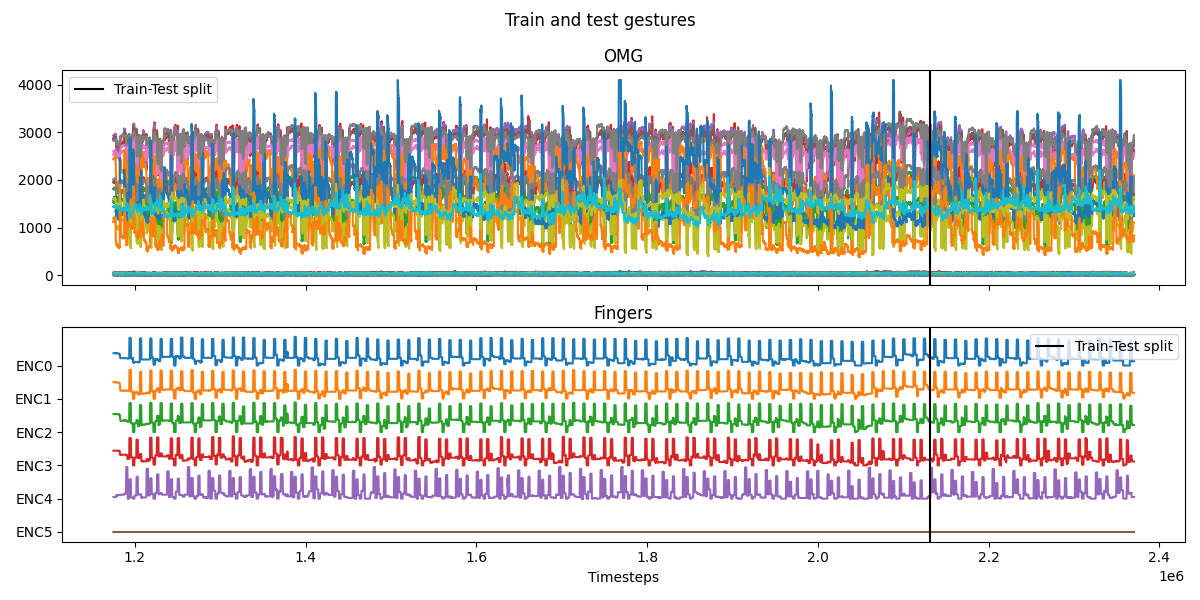

In [9]:
fig, axx = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
plt.sca(axx[0])
plot_train = plt.plot(gestures_train['ts'].values, gestures_train[OMG_CH].values)
plot_test = plt.plot(gestures_test['ts'].values, gestures_test[OMG_CH].values)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.axvline(gestures_train['ts'].values[-1], color='k', label='Train-Test split')
plt.title('OMG')
plt.legend()

plt.sca(axx[1])
plot_train = plt.plot(gestures_train['ts'].values, gestures_train[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 100)
plot_test = plt.plot(gestures_test['ts'].values, gestures_test[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 100)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.axvline(gestures_train['ts'].values[-1], color='k', label='Train-Test split')
plt.yticks(-np.arange(len(GLOVE_CH)) * 100, GLOVE_CH)
plt.legend()
plt.title('Fingers')
plt.xlabel('Timesteps')

plt.suptitle('Train and test gestures')
plt.tight_layout()

### Protocol

In [11]:
#gestures_protocol = pd.read_csv('gestures_protocol.csv')
gestures_protocol= mounts['gestures_protocol']
gestures_protocol.head(10)

,Thumb,Index,Middle,Ring,Pinky,Thumb_stretch,Index_stretch,Middle_stretch,Ring_stretch,Pinky_stretch,Pronation
epoch,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [12]:
# add OPEN to protocol
mask_open = (gestures_protocol[['Thumb_stretch', 'Index_stretch', 'Middle_stretch', 'Ring_stretch', 'Pinky_stretch']] == 1.0).all(axis=1)
gestures_protocol.loc[mask_open, ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']] = -0.5

In [13]:
gestures_train_ext = pd.merge(
    gestures_train,
    gestures_protocol,
    how='left',
    left_on='SYNC',
    right_on='epoch',
)

gestures_test_ext = pd.merge(
    gestures_test,
    gestures_protocol,
    how='left',
    left_on='SYNC',
    right_on='epoch',
)

In [14]:
gestures_train_ext.isna().sum().unique(), gestures_test_ext.isna().sum().unique()

(array([0], dtype=int64), array([0], dtype=int64))

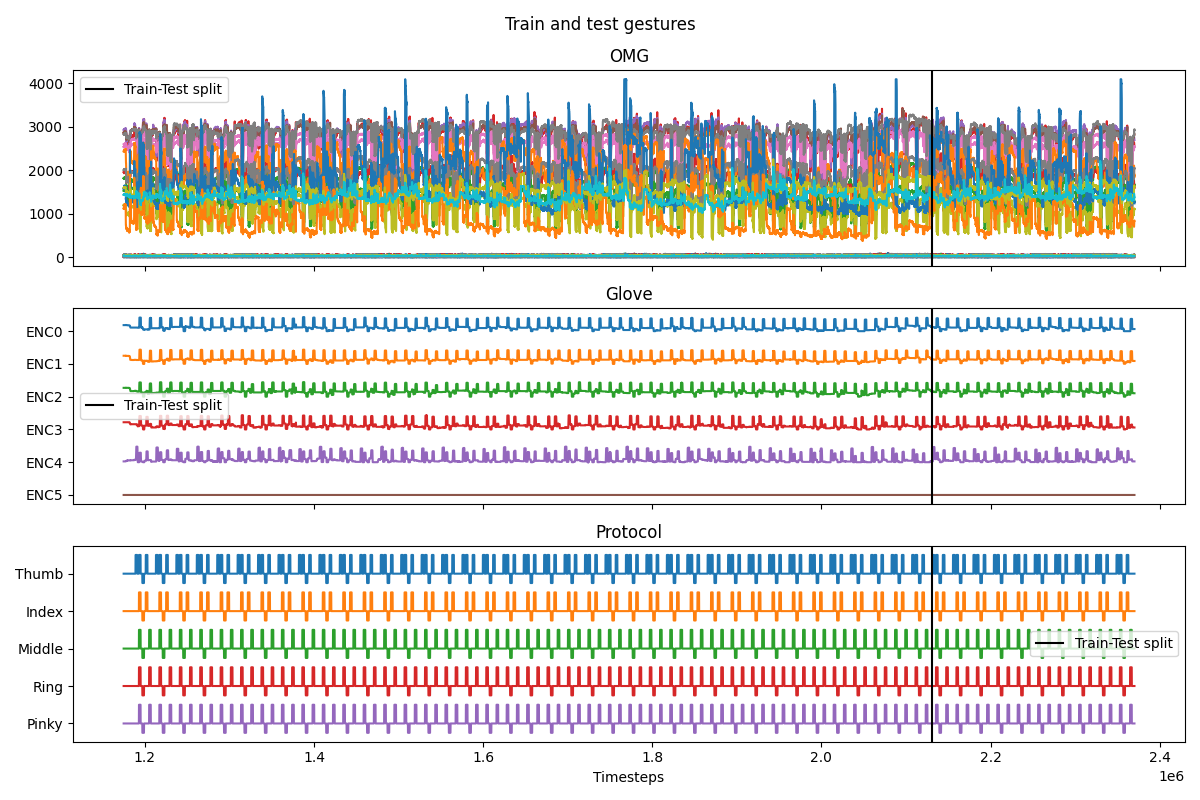

In [15]:
fig, axx = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
plt.sca(axx[0])
plot_train = plt.plot(gestures_train_ext['ts'].values, gestures_train_ext[OMG_CH].values)
plot_test = plt.plot(gestures_test_ext['ts'].values, gestures_test_ext[OMG_CH].values)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.axvline(gestures_train_ext['ts'].values[-1], color='k', label='Train-Test split')
plt.legend()
plt.title('OMG')

plt.sca(axx[1])
plot_train = plt.plot(gestures_train_ext['ts'].values, gestures_train_ext[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 200)
plot_test = plt.plot(gestures_test_ext['ts'].values, gestures_test_ext[GLOVE_CH].values - np.arange(len(GLOVE_CH)) * 200)
for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.yticks(-np.arange(len(GLOVE_CH)) * 200, GLOVE_CH)
plt.axvline(gestures_train_ext['ts'].values[-1], color='k', label='Train-Test split')
plt.legend()
plt.title('Glove')

plt.sca(axx[2])

plot_train = plt.plot(
    gestures_train_ext['ts'].values,
    gestures_train_ext[['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']].values - np.arange(5) * 2
)

plot_test = plt.plot(
    gestures_test_ext['ts'].values,
    gestures_test_ext[['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']].values - np.arange(5) * 2
)

for p_train, p_test in zip(plot_train, plot_test):
    p_test.set_color(p_train.get_color())
plt.yticks(-np.arange(5) * 2, ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky'])
plt.axvline(gestures_train_ext['ts'].values[-1], color='k', label='Train-Test split')
plt.legend()
plt.xlabel('Timesteps')
plt.title('Protocol')

plt.suptitle('Train and test gestures')
plt.tight_layout()

# Dataset forming

In [12]:
# # v2 y(t) ~ f[ X(t), y(t-1) ] - это не подойдет для инференса в реальном времени, тк мы будем получать X и y в один момент времени.

# X_train = gestures_train[OMG_CH].values
# y_train = gestures_train[GLOVE_CH].values
# X_train = np.c_[X_train[1:], y_train[:-1]] # coordiantes
# # X_train = np.c_[X_train[1:], gestures_train[GLOVE_CH].diff().fillna(0).values[:-1]] # velocities
# y_train = y_train[1:]

# X_test = gestures_test[OMG_CH].values
# y_test = gestures_test[GLOVE_CH].values
# X_test = np.c_[X_test[1:], y_test[:-1]] # coordiantes
# # X_test = np.c_[X_test[1:], gestures_test[GLOVE_CH].diff().fillna(0).values[:-1]] # velocities
# y_test = y_test[1:]

In [13]:
# v2 y(t) ~ f[ X(t-1), y(t-1) ] - это подойдет для инференса в реальном времени

X_train = gestures_train[OMG_CH].values
y_train = gestures_train[GLOVE_CH].values
X_train = np.c_[X_train[:-1], y_train[:-1]]
y_train = y_train[1:]

X_test = gestures_test[OMG_CH].values
y_test = gestures_test[GLOVE_CH].values
X_test = np.c_[X_test[:-1], y_test[:-1]]
y_test = y_test[1:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21319, 56), (21319, 6), (5329, 56), (5329, 6))

In [14]:
X_train = X_train.astype(float)
X_test  = X_test.astype(float)
y_train = y_train.astype(float)
y_test  = y_test.astype(float)

y_train = pd.DataFrame(y_train, columns=GLOVE_CH, index=gestures_train.index[1:])
y_test  = pd.DataFrame(y_test, columns=GLOVE_CH, index=gestures_test.index[1:])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21319, 56), (21319, 6), (5329, 56), (5329, 6))

In [15]:
print((X_train[:, :50]).mean(axis=0))
print((X_train[:, 50:]).mean(axis=0))
print(y_train.values.mean(axis=0))

[  10.31038041    7.93850556   53.27149491 3336.40855575 3638.94211736
 3450.98813265 1881.20695155   10.3340682     6.24100568    5.53299873
    8.27482527   23.50044561 2767.26746095 2129.6019044    77.39387401
   63.53811154 1968.07744266  990.55945401   17.29959191    4.94450959
   10.61503823 1078.45447723 1167.45227262   47.49204935   15.67259252
   13.01824663   39.01374361 1429.3606642  1204.54993199   13.92996857
 3385.11773535  874.2965899    45.29396313   15.01721469    8.97176228
    7.63530184   12.15183639   37.94854355 1126.67165439 1152.39424926
   40.91420798   26.49509827   15.11895492   12.62540457   10.94488484
    9.36896665   10.69642103   14.26694498   26.56034523   24.27674844]
[28.02823772 34.7473146  44.78999953 36.17725972 36.82668043  0.        ]
[28.02819082 34.74665791 44.78953047 36.17918289 36.82691496  0.        ]


In [16]:
# # scaling
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = MinMaxScaler()
# X_train[:, :50] = scaler.fit_transform(X_train[:, :50])
# X_test[:, :50] = scaler.transform(X_test[:, :50])

# X_train[:, 50:] = X_train[:, 50:] / 100
# X_test[:, 50:] = X_test[:, 50:] / 100

# y_train = y_train / 100
# y_test = y_test / 100

In [17]:
print((X_train[:, :50]).mean(axis=0))
print((X_train[:, 50:]).mean(axis=0))
print(y_train.values.mean(axis=0))

[  10.31038041    7.93850556   53.27149491 3336.40855575 3638.94211736
 3450.98813265 1881.20695155   10.3340682     6.24100568    5.53299873
    8.27482527   23.50044561 2767.26746095 2129.6019044    77.39387401
   63.53811154 1968.07744266  990.55945401   17.29959191    4.94450959
   10.61503823 1078.45447723 1167.45227262   47.49204935   15.67259252
   13.01824663   39.01374361 1429.3606642  1204.54993199   13.92996857
 3385.11773535  874.2965899    45.29396313   15.01721469    8.97176228
    7.63530184   12.15183639   37.94854355 1126.67165439 1152.39424926
   40.91420798   26.49509827   15.11895492   12.62540457   10.94488484
    9.36896665   10.69642103   14.26694498   26.56034523   24.27674844]
[28.02823772 34.7473146  44.78999953 36.17725972 36.82668043  0.        ]
[28.02819082 34.74665791 44.78953047 36.17918289 36.82691496  0.        ]


# Modeling

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

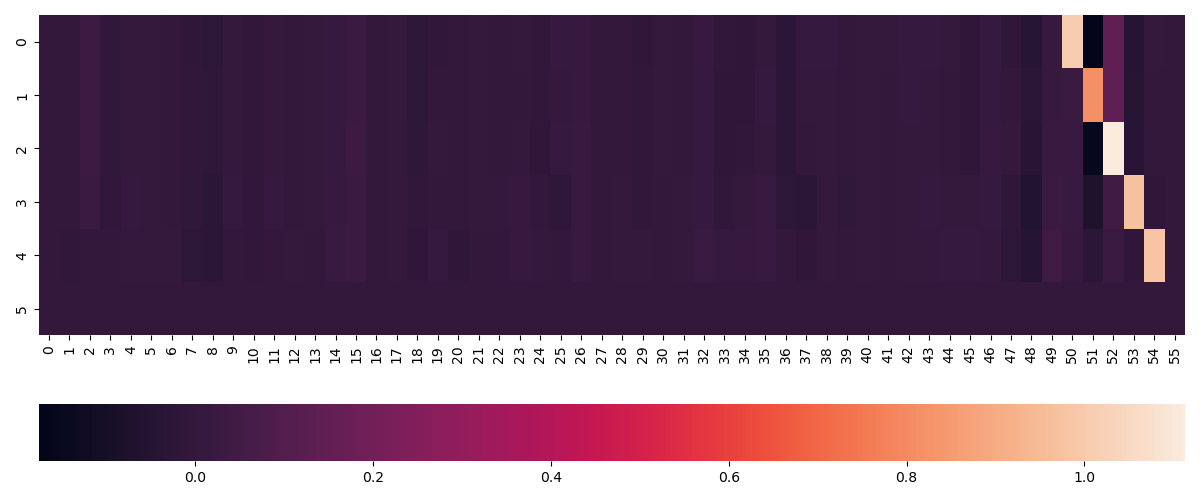

In [19]:
import seaborn as sns

plt.figure(figsize=(12, 5))
# IMPORTANT: "подсветились" именно авторегрессионные таргет-признаки
#            поэтому высокий риск вырождения модели в предсказание предыдущего значения таргета,
#            которое прихордит на вход в качестве признака
sns.heatmap(model.coef_, cbar_kws={"orientation": "horizontal"})
plt.tight_layout()

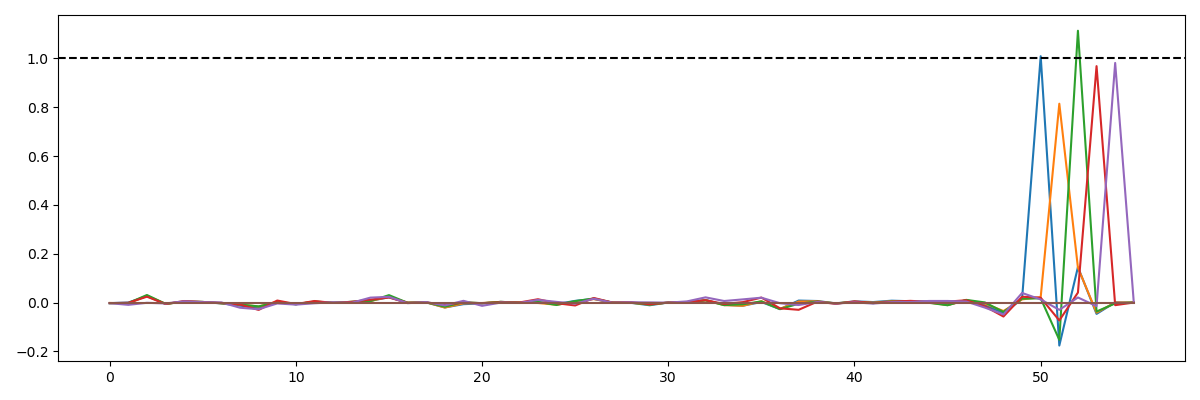

In [20]:
# IMPORTANT:
#   - данный график отражает веса признаков в моделях
#   - в основном веса примерно равны нулю, кроме последних пиков справа
#   - пики справа - это как раз авторегрессионные таргет-признаки
#   - видно, что веса этих признаков примерно равны 1
#   - это означает, что модель предсказывает предыдущее значение таргета
plt.figure(figsize=(12, 4))
plt.plot(model.coef_.T)
plt.axhline(1, color='k', linestyle='--')
plt.tight_layout()

## Prediction

In [21]:
# classic prediction
y_pred_train = model.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train, columns=GLOVE_CH, index=gestures_train.index[1:])

y_pred_test = model.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test, columns=GLOVE_CH, index=gestures_test.index[1:])

In [22]:
# # refeed prediction
# y_pred_train = np.zeros_like(y_train)
# y_pred_prev = np.zeros((1, len(GLOVE_CH)))
# for i in range(len(y_train)):
#     X_cur = np.c_[X_train[[i], : -len(GLOVE_CH)], y_pred_prev]
#     y_pred_train[i] = model.predict(X_cur)
#     y_pred_prev = y_pred_train[[i]].copy()

# y_pred_test = np.zeros_like(y_test)
# y_pred_prev = np.zeros((1, len(GLOVE_CH)))
# for i in range(len(y_test)):
#     X_cur = np.c_[X_test[[i], : -len(GLOVE_CH)], y_pred_prev]
#     y_pred_test[i] = model.predict(X_cur)
#     y_pred_prev = y_pred_test[[i]].copy()

# y_pred_train = pd.DataFrame(y_pred_train, columns=GLOVE_CH, index=gestures_train.index[1:])
# y_pred_test = pd.DataFrame(y_pred_test, columns=GLOVE_CH, index=gestures_test.index[1:])

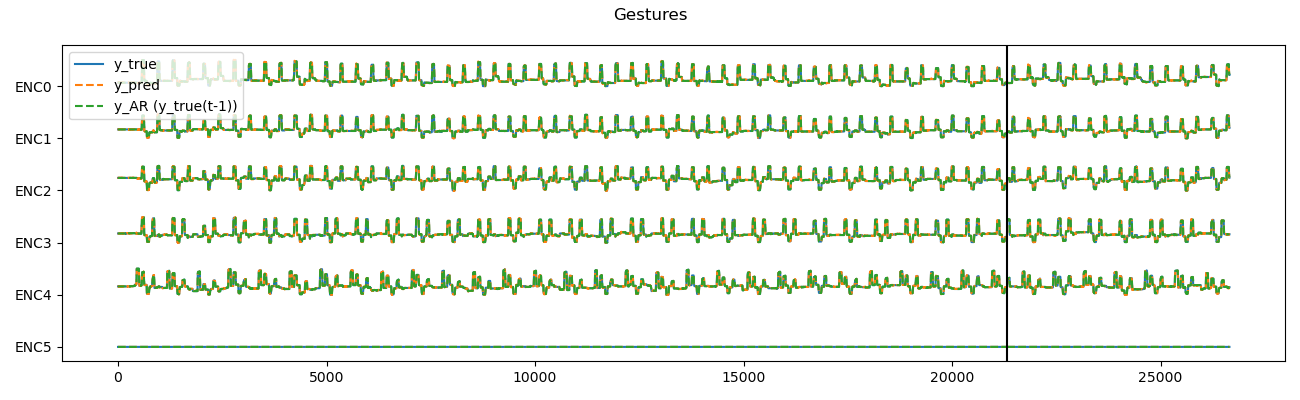

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(13, 4))

plt.sca(axes)
lines = []
labels = []
yticks = -np.arange(len(GLOVE_CH)) * 200

p = plt.plot(y_train.index, y_train + yticks, c='C0')
plt.plot(y_test.index, y_test + yticks, c='C0')
lines += [p[0]]
labels += ['y_true']

p = plt.plot(y_pred_train.index, y_pred_train.values + yticks, c='C1', linestyle='--')
plt.plot(y_pred_test.index, y_pred_test.values + yticks, c='C1', linestyle='--')
lines += [p[0]]
labels += ['y_pred']

p = plt.plot(y_pred_train.index, X_train[:, -len(GLOVE_CH):] + yticks, c='C2', linestyle='--')
plt.plot(y_pred_test.index, X_test[:, -len(GLOVE_CH):] + yticks, c='C2', linestyle='--')
lines += [p[0]]
labels += ['y_AR (y_true(t-1))']

plt.axvline(len(y_train), color='k')

plt.yticks(yticks, GLOVE_CH)
plt.legend(lines, labels, loc='upper left')
plt.suptitle(f'Gestures')
plt.tight_layout()

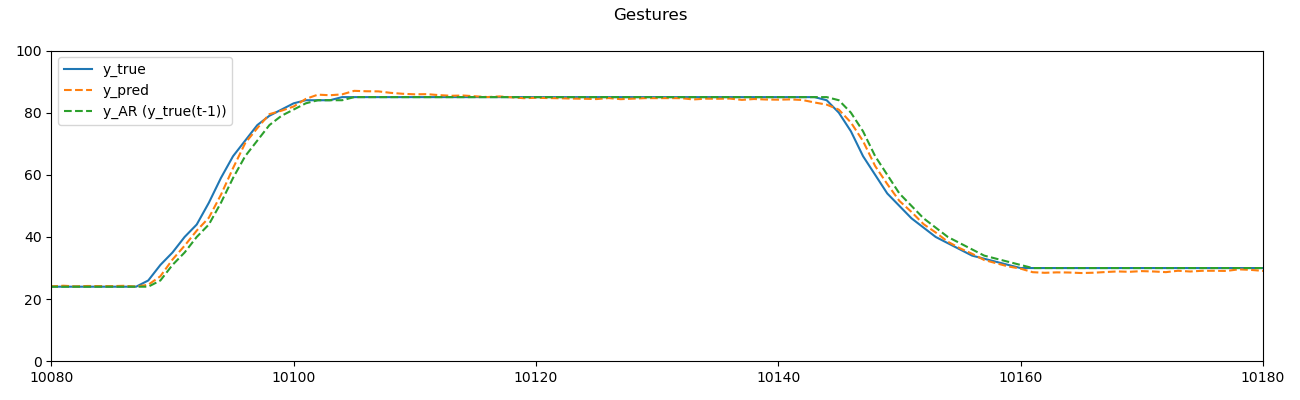

In [24]:
fig, axes = plt.subplots(1, 1, figsize=(13, 4))

plt.sca(axes)
lines = []
labels = []
yticks = -np.arange(len(GLOVE_CH)) * 200

p = plt.plot(y_train.index, y_train + yticks, c='C0')
plt.plot(y_test.index, y_test + yticks, c='C0')
lines += [p[0]]
labels += ['y_true']

p = plt.plot(y_pred_train.index, y_pred_train.values + yticks, c='C1', linestyle='--')
plt.plot(y_pred_test.index, y_pred_test.values + yticks, c='C1', linestyle='--')
lines += [p[0]]
labels += ['y_pred']

p = plt.plot(y_pred_train.index, X_train[:, -len(GLOVE_CH):] + yticks, c='C2', linestyle='--')
plt.plot(y_pred_test.index, X_test[:, -len(GLOVE_CH):] + yticks, c='C2', linestyle='--')
lines += [p[0]]
labels += ['y_AR (y_true(t-1))']

plt.axvline(len(y_train), color='k')

plt.xlim(10080, 10180)
plt.ylim(0, 100)

plt.legend(lines, labels, loc='upper left')
plt.suptitle(f'Gestures')
plt.tight_layout()

## Metrics

In [25]:
from sklearn.metrics import mean_squared_error as mse

metrics_train = {col : mse(y_train[col], y_pred_train[col]) for col in GLOVE_CH}
metrics_test  = {col : mse(y_test[col],  y_pred_test[col])  for col in GLOVE_CH}

metrics_train = pd.Series(metrics_train)
metrics_test = pd.Series(metrics_test)

print('Train')
display(metrics_train)
print('Test')
display(metrics_test)

Train


ENC0    1.708782
ENC1    1.388752
ENC2    1.456644
ENC3    2.217182
ENC4    2.038705
ENC5    0.000000
dtype: float64

Test


ENC0    1.734118
ENC1    1.620531
ENC2    1.662416
ENC3    2.439612
ENC4    2.002402
ENC5    0.000000
dtype: float64

# Real-time inference

In [26]:
import time
import serial
from IPython.display import clear_output

In [27]:
crc_table = [
    54, 181, 83, 241, 89, 16, 164, 217, 34, 169, 220, 160, 11, 252,
    111, 241, 33, 70, 99, 240, 234, 215, 60, 206, 68, 126, 152, 81,
    113, 187, 14, 21, 164, 172, 251, 16, 248, 215, 236, 90, 49, 53,
    179, 156, 101, 55, 65, 130, 161, 22, 218, 79, 24, 168, 152, 205,
    115, 141, 23, 86, 141, 58, 122, 215, 252, 48, 69, 115, 138, 66,
    88, 37, 63, 104, 176, 46, 139, 246, 222, 184, 103, 92, 154, 174,
    97, 141, 195, 166, 227, 150, 140, 48, 121, 243, 13, 131, 210, 199,
    45, 75, 180, 104, 97, 82, 251, 90, 132, 111, 229, 175, 146, 216,
    153, 86, 166, 33, 184, 100, 225, 248, 186, 54, 89, 39, 2, 214, 2,
    114, 197, 6, 35, 188, 245, 64, 220, 37, 123, 132, 190, 60, 189, 53,
    215, 185, 238, 145, 99, 226, 79, 54, 102, 118, 210, 116, 51, 247,
    0, 191, 42, 45, 2, 132, 106, 52, 63, 159, 229, 157, 78, 165, 50,
    18, 108, 193, 166, 253, 3, 243, 126, 111, 199, 152, 36, 114, 147,
    57, 87, 14, 16, 160, 128, 97, 189, 51, 115, 142, 8, 70, 71, 55, 42,
    193, 65, 207, 122, 158, 26, 21, 72, 139, 33, 230, 230, 116, 134, 5,
    213, 165, 107, 41, 134, 219, 190, 26, 29, 136, 174, 190, 108, 185, 172,
    137, 239, 164, 208, 207, 206, 98, 207, 12, 0, 174, 64, 20, 90, 49, 12,
    67, 112, 109, 78, 114, 165, 244, 183, 121
];
    
def get_crc(data, count):
    result = 0x00
    l = count
    while (count>0):   
        result = crc_table[result ^ data[l-count]]
        count -= 1;
    return result;

def drv_abs_one(ser, control):
    if ser is None:
        return
    pack = (np.array([80, 0x01, 0xBB, 6] + [c for c in control] + [0], dtype='uint8'))
    pack[-1] = get_crc(pack[1:], 9)
    return (pack, ser.write(bytearray(pack)))

## Inference Utils: Put your code here

In [28]:
def preprocessing(x):
    # x - sample vector
    y = x
    return y

def inference(x):
    y = model.predict([x])[0] 
    return y

def postprocessing(x, prev):
    if prev is None:
        y = x
    else:
        y = x*0.1 + prev*0.9 # Holt-Winters filter
    return y

def commands(x):
    y = np.round(np.clip(x / 100, 0, 1)*100).astype(int)
    return y

## Inference

### Offline (dataset)

In [29]:
df_sim = gestures_test.copy()
# df_sim = free_movements.iloc[:10000]
print(df_sim.shape)

(5330, 65)


In [30]:
TIMEOUT = 0.033
DEBUG = True
    
i = 0
ts_old = time.time()
ts_diff = 0;

y_predicted = np.zeros(6)
y_previous = None
y_dct = {
    'omg_sample':[],
    'enc_sample':[],
    'sample_preprocessed':[],
    
    'y_predicted':[],
    'y_postprocessed':[],
    'y_commands':[],
}
while True:    
    
    # [Data reading]
    ts_start = time.time()
    
    try:
        # [Sim data]
        if i < len(df_sim):
            sample = df_sim.values[i]
        else:
            break
        # [/Sim data]
        [omg_sample, acc_sample, enc_sample, [button, sync, ts]] = np.array_split(sample, [50, 56, 62])
        
    except Exception as e:
        print(e)
        
    # [/Data Reading]
        
    # [Data preprocessing]
    sample_preprocessed = preprocessing(omg_sample)
    # [/Data preprocessing]
    
    # [Inference]
    # classic prediction
    y_predicted         = inference(np.r_[sample_preprocessed, enc_sample])
    # refeed prediction
    # y_predicted         = inference(np.r_[sample_preprocessed, y_predicted])
    # [/Inference]
    
    # [Inference Postprocessing]
    y_postprocessed     = postprocessing(y_predicted, y_previous)
    # [/Inference Postprocessing]
    
    # [Commands composition]
    y_commands          = commands(y_postprocessed)
    # [/Commands composition]
    
    # [Commands sending]
    # NO COMMANDS SENDING IN SIMULATION
    # [/Commands sending]
    
    # [Data logging]
    y_dct['omg_sample'].append(omg_sample)
    y_dct['enc_sample'].append(enc_sample)
    y_dct['sample_preprocessed'].append(sample_preprocessed)
    y_dct['y_predicted'].append(y_predicted)
    y_dct['y_postprocessed'].append(y_postprocessed)
    y_dct['y_commands'].append(y_commands)
    # [/Data logging]

    y_previous = y_postprocessed
    
    if DEBUG:
        clear_output(wait=True)

        # sanity check: Sizes of SAMPLE=65, OMG=50, ACC=6, ENCODERS=6
        print(f'SAMPLE SIZE: {len(sample)}, OMG: {len(omg_sample)}, ACC: {len(acc_sample)}, ENCODERS: {len(enc_sample)}')
        print(f'BUTTON: {button}, SYNC: {sync}, TS: {ts}')
        print(y_commands)
    
    ts_diff = time.time() - ts_start
    assert(ts_diff<TIMEOUT), 'Calculation cycle takes more than TIMEOUT, halting...'
    ts_old = ts_start
    i += 1 

SAMPLE SIZE: 65, OMG: 50, ACC: 6, ENCODERS: 6
BUTTON: 0, SYNC: 0, TS: 1041207
[54 53 59 31 28  0]


In [31]:
for key, val in y_dct.items():
    # print(f"len({key}) = {len(y_dct[key])}")
    y_dct[key] = np.stack(val)
    print(f"{key}.shape = {y_dct[key].shape}")

omg_sample.shape = (5330, 50)
enc_sample.shape = (5330, 6)
sample_preprocessed.shape = (5330, 50)
y_predicted.shape = (5330, 6)
y_postprocessed.shape = (5330, 6)
y_commands.shape = (5330, 6)


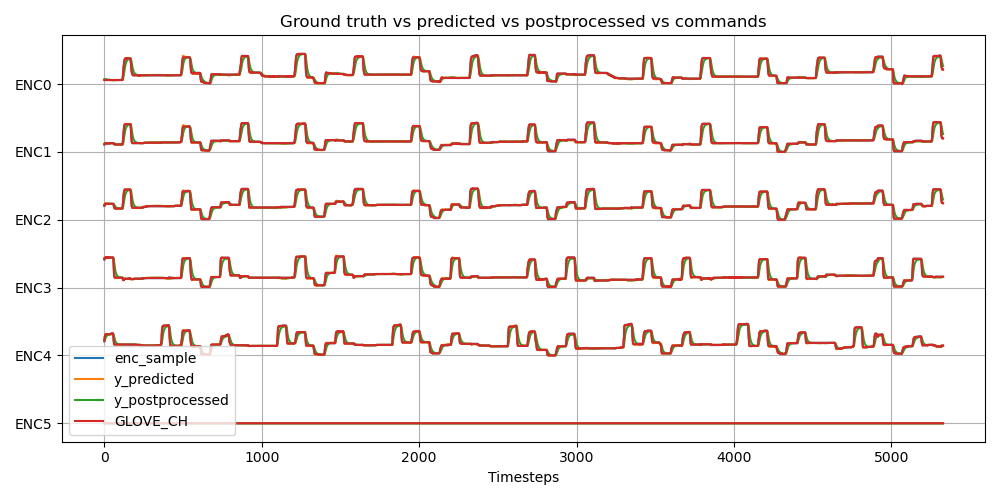

In [32]:
fig = plt.figure(figsize=(10, 5))

lines = []
labels = []
yticks = -np.arange(len(GLOVE_CH)) * 200

plots = plt.plot(y_dct['enc_sample'] + yticks, c='C0')
lines += [plots[0]]
labels += ['enc_sample']

plots = plt.plot(y_dct['y_predicted'] + yticks, c='C1')
lines += [plots[0]]
labels += ['y_predicted']

plots = plt.plot(y_dct['y_postprocessed'] + yticks, c='C2')
lines += [plots[0]]
labels += ['y_postprocessed']

# plots = plt.plot(y_dct['y_commands'] + yticks, c='C3')
# lines += [plots[0]]
# labels += ['y_commands']

plots = plt.plot(df_sim[GLOVE_CH].values[1:] + yticks, c='C3') # shift by 1 timestep forward
lines += [plots[0]]
labels += ['GLOVE_CH']

plt.title('Ground truth vs predicted vs postprocessed vs commands')
plt.yticks(yticks, GLOVE_CH)
plt.legend(lines, labels)
plt.grid()
plt.xlabel('Timesteps')

plt.tight_layout()

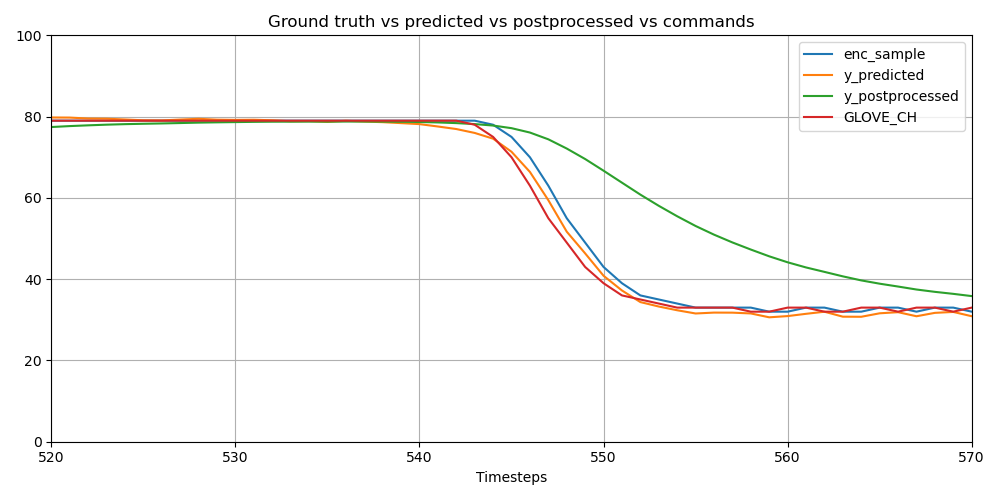

In [33]:
fig = plt.figure(figsize=(10, 5))

lines = []
labels = []
yticks = -np.arange(len(GLOVE_CH)) * 200

plots = plt.plot(y_dct['enc_sample'] + yticks, c='C0')
lines += [plots[0]]
labels += ['enc_sample']

plots = plt.plot(y_dct['y_predicted'] + yticks, c='C1')
lines += [plots[0]]
labels += ['y_predicted']

plots = plt.plot(y_dct['y_postprocessed'] + yticks, c='C2')
lines += [plots[0]]
labels += ['y_postprocessed']

# plots = plt.plot(y_dct['y_commands'] + yticks, c='C3')
# lines += [plots[0]]
# labels += ['y_commands']

plots = plt.plot(df_sim[GLOVE_CH].values[1:] + yticks, c='C3') # shift by 1 timestep forward
lines += [plots[0]]
labels += ['GLOVE_CH']

plt.xlim(520, 570)
plt.ylim(0, 100)

plt.title('Ground truth vs predicted vs postprocessed vs commands')
plt.legend(lines, labels)
plt.grid()
plt.xlabel('Timesteps')

plt.tight_layout()

### Online (prosthesis or virtual hand)

In [ ]:
TIMEOUT = 0.033
DEBUG = True

ser = None
# ser_port = None
ser_port = '/dev/cu.usbmodem3498365F31351'

if ser_port is not None:
    ser = serial.Serial(port=ser_port, timeout=2*TIMEOUT)
    ser.write('T1#\r\n'.encode('utf-8')) # T1 for Timestamp activate
    ser.write('M2#\r\n'.encode('utf-8')) # M2 for Mode == 2 = send samples
    ser.write('S2#\r\n'.encode('utf-8')) # SYNC to 2 for sanity check

    # flush buffers
    ser.reset_input_buffer()
    ser.read()
    
    i = 0;
    while(ser.in_waiting):
        print(f'Flushing buffers {i}: {ser.in_waiting}', end='    \r')
        ser.read_all()
        time.sleep(0.005)
        i+=1;
    ser.readline()
    ser.readline()
    
i = 0
ts_old = time.time()
ts_diff = 0;

y_previous = None
while True:    
    
    # [Data reading]
    s = ser.readline()
    ts_start = time.time()
    
    try:
        sample = np.array(s.decode('UTF-8')\
                           .replace('\r\n', "")\
                           .split(' ')
                         ).astype(int)
        [omg_sample, acc_sample, enc_sample, [button, sync, ts]] = np.array_split(sample, [50, 56, 62])
        
    except Exception as e:
        print(e)
        
    # [/Data Reading]
        
    # [Data preprocessing]
    sample_preprocessed = preprocessing(omg_sample)
    # [/Data preprocessing]
    
    # [Inference]
    y_predicted         = inference(sample_preprocessed)
    # [/Inference]
    
    # [Inference Postprocessing]
    y_postprocessed     = postprocessing(y_predicted, y_previous)
    # [/Inference Postprocessing]
    
    # [Commands composition]
    y_commands          = commands(y_postprocessed)
    # [/Commands composition]
    
    # [Commands sending]
    pack, _ = drv_abs_one(ser, list(y_commands)); # + [0]
    # [/Commands sending]
    
    y_previous = y_postprocessed
    
    if DEBUG:
        clear_output(wait=True)

        # sanity check: iteration should increase monotonically, TIMEDIFF approximately 32-34 ms, CYCLETIME < TIMEOUT, WAITING should be == 0
        print(f'ITERATION:\t{i}\tTIMEDIFF:\t{(ts_start - ts_old)*1000: .0f}\tCYCLETIME:\t{ts_diff*1000:.0f}\tWAITING:\t{ser.in_waiting}')
        print('INPUT:\n', s)

        # sanity check: Sizes of SAMPLE=65, OMG=50, ACC=6, ENCODERS=6
        print(f'SAMPLE SIZE: {len(sample)}, OMG: {len(omg_sample)}, ACC: {len(acc_sample)}, ENCODERS: {len(enc_sample)}')
        print(f'BUTTON: {button}, SYNC: {sync}, TS: {ts}')
        print(y_commands)
        print(pack)
    
    ts_diff = time.time() - ts_start
    assert(ts_diff<TIMEOUT), 'Calculation cycle takes more than TIMEOUT, halting...'
    ts_old = ts_start
    i += 1 